# Exercise lecture 4

#### Part 1

In [1]:
import numpy as np
import pylab as plt
from scipy.stats import norm

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
N = 5
mu = 1
sigma = 0.2
np.random.seed(42)
sample = norm.rvs(mu, sigma,N)
print(sample)

[1.09934283 0.97234714 1.12953771 1.30460597 0.95316933]


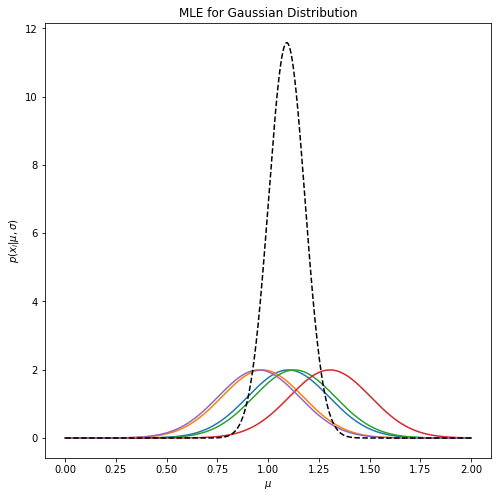

In [38]:
xgrid = np.linspace(0, 2, 1000)
Ls = np.array([norm.pdf(xgrid, s, 0.2) for s in sample])
L = np.prod(Ls, axis = 0)

fig, ax = plt.subplots(figsize = (8, 8))

for thisL in Ls:
    plt.plot(xgrid, thisL, ls = '-')
plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution');

Just read off the maximum likelihood solution (checkout np.argsort)

In [44]:
sorted_indices = np.argsort(L)
index_max = sorted_indices[-1]
print("Likelihood is maximized at %.3f" % xgrid[index_max])
# Compare it with the MLE estimator derived above
MLest = np.mean(sample)
print("The mean is my estimator", MLest)

Likelihood is maximized at 1.091
The mean is my estimator 1.0918005948650173


#### part 2

In [47]:
sigma_mu = np.diff(np.log(L), n = 2)
sigma_mu /= (xgrid[1]-xgrid[0])**2
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)[0]
print("Fisher matrix error on estimated mean is %.3f" % sigma_mu)

Fisher matrix error on estimated mean is 0.089


In [48]:
MLEsigma = sigma/N**0.5
print("Fisher matrix error", MLEsigma)

Fisher matrix error 0.08944271909999159


Plot a Gaussian at the measured 
with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

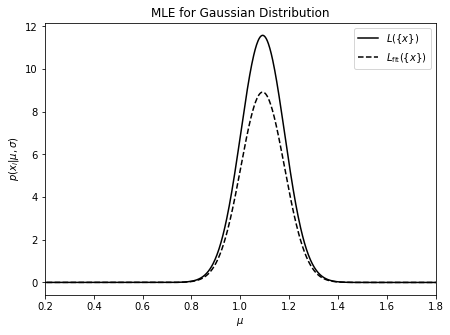

In [57]:
Lfit = norm.pdf(xgrid, loc = MLest, scale = MLEsigma)

fig, ax = plt.subplots(figsize = (7, 5))

# plot numerical likelihood
plt.plot(xgrid, L , ls='-', c='black', 
         label = r'$L(\{x\})$')

# plot fitted Gaussian with arbitrary normalizing constant
# offset for ease of viewing
C =2  # 2.6
plt.plot(xgrid, C*Lfit, ls='dashed', 
         c='black', label=r'$L_\mathrm{fit}(\{x\})$')

plt.xlim(0.2, 1.8)
#plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

####  Part 3

In [58]:
N = 5
mu = 1
sigma = norm.rvs(0.2, 0.05, N)
np.random.seed(42)
sample = np.concatenate([norm.rvs(mu, s, 1) for s in sigma])
print(sample)

[1.09352787 0.9614297  1.15439064 1.2688548  0.94681721]


(5, 1000)


Text(0.5, 1.0, 'MLE for Gaussian Distribution')

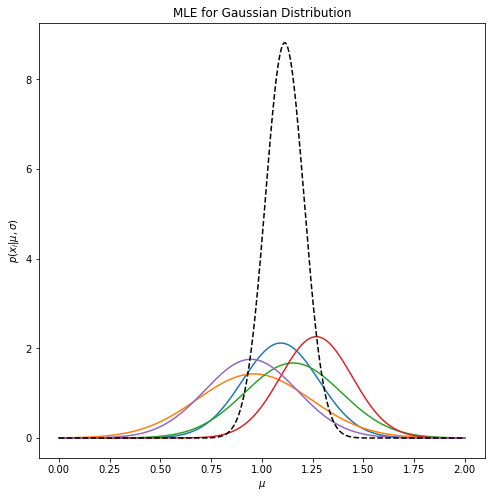

In [60]:
xgrid = np.linspace(0, 2, 1000)

Ls = np.array([norm.pdf(xgrid, loc = s, scale = ss) for s, ss in zip(sample, sigma)])
print(Ls.shape)
L = np.prod(Ls, axis = 0)
fig, ax = plt.subplots(figsize = (8, 8))

for thisL in Ls:
    plt.plot(xgrid, thisL, ls = '-')

plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')

#plt.xlim(0.2, 1.8)
#plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')

In [61]:
sorted_indices = np.argsort(L)
index_max = sorted_indices[-1]
print("Likelihood is maximized at %.3f" % xgrid[index_max])

MLest = np.average(sample,weights=1/sigma**2)
print("The mean is my estimator", MLest)

sigma_mu = np.diff(np.log(L), n=2)
sigma_mu /= (xgrid[1]-xgrid[0])**2
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)[0]

print("Fisher matrix error on estimated mean is %.3f" % sigma_mu)

MLEsigma = np.sum(sigma**-2)**-0.5
print("Fisher matrix error", MLEsigma)

Likelihood is maximized at 1.113
The mean is my estimator 1.1131053846960444
Fisher matrix error on estimated mean is 0.095
Fisher matrix error 0.09528984929090246
